In [19]:
import numpy as np
import matplotlib.pyplot as plt

## Multivariate Distance Outlier Detection
Detect outliers for multi-dimensional data

1. Euclidean distance to calculate distance to the mean
2. Z-normalize distances
3. Identify outliers based on subjectively determined threshold

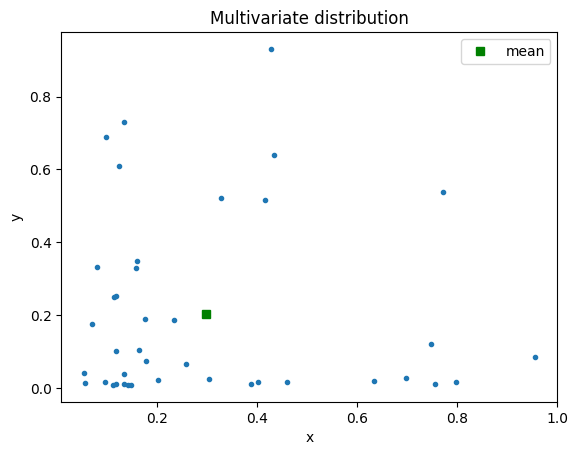

In [20]:
n = 40

x = np.exp(-abs(np.random.rand(n)*3))
y = np.exp(-abs(np.random.rand(n)*5))
mean = (np.mean(x), np.mean(y))

fig_a, ax_a = plt.subplots()

ax_a.plot(x, y, '.')
ax_a.plot(np.mean(x), np.mean(y), 'gs', markersize=6, label='mean')
ax_a.set_title('Multivariate distribution')
ax_a.set_xlabel('x')
ax_a.set_ylabel('y')
ax_a.legend()

fig_a.show()

## Euclidean distance
euclidean(a, b) = sqrt((a(x) - b(x)) **2 + (a(y) - b(y))**2)

In [21]:
euclidean = lambda a, b: np.sqrt(np.sum([(x - y)**2 for x, y in zip(a, b)]))

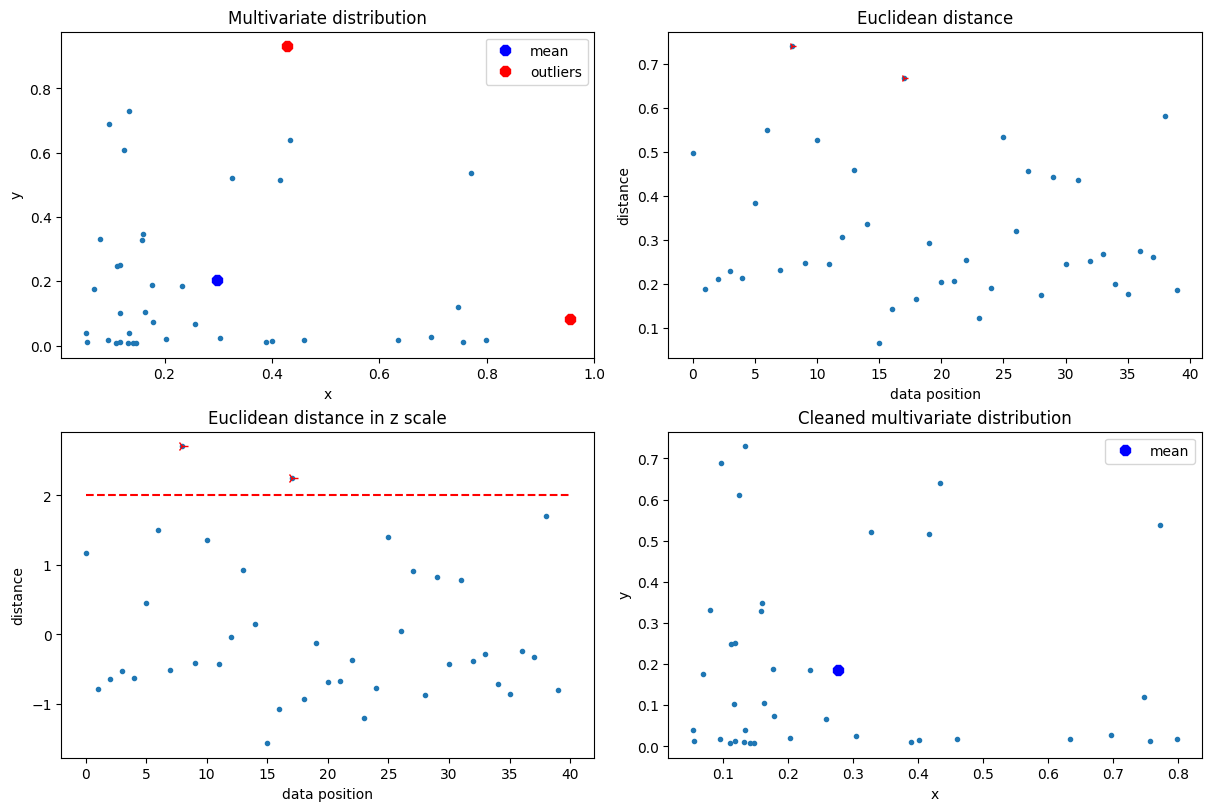

In [22]:
z_scale = lambda x: (x - np.mean(x)) / np.std(x, ddof=1)
threshold = 2

distances = np.array([euclidean(point, mean) for point in zip(x, y)])
distances_z = z_scale(distances)
outliers = np.where(distances_z > threshold)[0]

x_cleaned = x.copy()
x_cleaned[outliers] = np.nan

y_cleaned = y.copy()
y_cleaned[outliers] = np.nan

fig_b, ax_b = plt.subplot_mosaic([['data', 'dist'], ['dist_z', 'data_cleaned']], figsize=[12, 8], layout='constrained')


ax_b['data'].plot(x, y, '.')
ax_b['data'].plot(np.mean(x), np.mean(y), 'b8', markersize=8, label='mean')
ax_b['data'].plot(x[outliers], y[outliers], 'r8', markersize=8, label='outliers')
ax_b['data'].set_title('Multivariate distribution')
ax_b['data'].legend()
ax_b['data'].set_xlabel('x')
ax_b['data'].set_ylabel('y')

ax_b['data_cleaned'].plot(x_cleaned, y_cleaned, '.')
ax_b['data_cleaned'].plot(np.nanmean(x_cleaned), np.nanmean(y_cleaned), 'b8', markersize=8, label='mean')
ax_b['data_cleaned'].legend()
ax_b['data_cleaned'].set_title('Cleaned multivariate distribution')
ax_b['data_cleaned'].set_xlabel('x')
ax_b['data_cleaned'].set_ylabel('y')

ax_b['dist'].plot(distances, '.')
ax_b['dist'].plot(outliers, distances[outliers], 'r4')
ax_b['dist'].set_title('Euclidean distance')
ax_b['dist'].set_ylabel('distance')
ax_b['dist'].set_xlabel('data position')

ax_b['dist_z'].plot(distances_z, '.')
ax_b['dist_z'].plot([0, len(distances_z)], [threshold, threshold], 'r--', label='threshold')
ax_b['dist_z'].plot(outliers, distances_z[outliers], 'r4', markersize=8, label='outliers')
ax_b['dist_z'].set_title('Euclidean distance in z scale')
ax_b['dist_z'].set_xlabel('data position')
ax_b['dist_z'].set_ylabel('distance')

fig_b.show()